## Data Creation

In [1]:
import pandas as pd
import random
import datetime

# Function to generate random data for user profiles each minute with patterns

#User1: More bg activities, more mouse clicks , less keyboard press, more open tabs
#User2: Medium bg activites, less mouse clicks, more keyboard press,more open tabs
#User3: Medium bg activites, less mouse clicks, less keyboard press, less open tabs
#User4: More bg activities, less mouse clicks, less keyboard press, more open tabs
#User5: Medium bg activites, more mouse clicks, more keyboard press, very less open tabs
def generate_minute_data_with_patterns(num_users=5, num_minutes=60):
    users = []

    for minute in range(num_minutes):
      time = datetime.datetime.now() - datetime.timedelta(minutes=minute)
      user = {
          'User_ID': 1,
          'Timestamp': time,
          'background_activity': random.randint(20, 50),
          'mouse': random.randint(30, 50),
          'keyboards': random.randint(5, 20),
          'explorer':random.uniform(0, 1),
          'edge':random.uniform(0, 1),
          'google':random.uniform(0, 1),
          'youtube':random.uniform(0, 1),
          'instagram':random.uniform(0, 1),
          'whatsapp':random.uniform(0, 1),
          'gmail':random.uniform(0, 1),
          'Total_open_tabs': random.randint(40, 80),
          'switch_between_tabs': random.randint(20, 30),
      }
      users.append(user)
      user = {
          'User_ID': 2,
          'Timestamp': time,
          'background_activity': random.randint(15, 30),
          'mouse': random.randint(5, 20),
          'keyboards': random.randint(30, 50),
          'explorer':random.uniform(0, 1),
          'edge':random.uniform(0, 1),
          'google':random.uniform(0, 1),
          'youtube':random.uniform(0, 1),
          'instagram':random.uniform(0, 1),
          'whatsapp':random.uniform(0, 1),
          'gmail':random.uniform(0, 1),
          'Total_open_tabs': random.randint(40, 80),
          'switch_between_tabs': random.randint(20, 35),
      }
      users.append(user)
      user = {
          'User_ID': 3,
          'Timestamp': time,
          'background_activity': random.randint(15, 30),
          'mouse': random.randint(5, 20),
          'keyboards': random.randint(5, 20),
          'explorer':random.uniform(0, 1),
          'edge':random.uniform(0, 1),
          'google':random.uniform(0, 1),
          'youtube':random.uniform(0, 1),
          'instagram':random.uniform(0, 1),
          'whatsapp':random.uniform(0, 1),
          'gmail':random.uniform(0, 1),
          'Total_open_tabs': random.randint(5, 20),
          'switch_between_tabs': random.randint(1, 10),
      }
      users.append(user)
      user = {
          'User_ID': 4,
          'Timestamp': time,
          'background_activity': random.randint(20, 50),
          'mouse': random.randint(5, 20),
          'keyboards': random.randint(5, 20),
          'explorer':random.uniform(0, 1),
          'edge':random.uniform(0, 1),
          'google':random.uniform(0, 1),
          'youtube':random.uniform(0, 1),
          'instagram':random.uniform(0, 1),
          'whatsapp':random.uniform(0, 1),
          'gmail':random.uniform(0, 1),
          'Total_open_tabs': random.randint(40, 80),
          'switch_between_tabs': random.randint(1, 10),
      }
      users.append(user)
      user = {
          'User_ID': 5,
          'Timestamp': time,
          'background_activity': random.randint(15, 30),
          'mouse': random.randint(30, 50),
          'keyboards': random.randint(30, 50),
          'explorer':random.uniform(0, 1),
          'edge':random.uniform(0, 1),
          'google':random.uniform(0, 1),
          'youtube':random.uniform(0, 1),
          'instagram':random.uniform(0, 1),
          'whatsapp':random.uniform(0, 1),
          'gmail':random.uniform(0, 1),
          'Total_open_tabs': random.randint(1, 5),
          'switch_between_tabs': random.randint(5, 20),
      }
      users.append(user)
    return users

# Generate user profiling data for each minute with patterns
user_minute_data = generate_minute_data_with_patterns(num_users=5, num_minutes=60)

# Create a pandas DataFrame
df = pd.DataFrame(user_minute_data)

## Random forest classifier

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'df' is the DataFrame with user profiling data

# Split the data into features (X) and target labels (y)
X = df.drop(['User_ID', 'Timestamp'], axis=1)  # Features excluding 'Profile_Type', 'Output_Value', and 'Timestamp'
y = df['User_ID']  # Target labels for multiclass classification

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Instantiate the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the model on the training set
clf.fit(X_train, y_train)

# Validate the model on the validation set
y_val_pred = clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.2f}')

# Test the model on the test set
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.2f}')

# Print classification report for more detailed metrics
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Validation Accuracy: 1.00
Test Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        12

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [3]:
pip install matplotlib seaborn

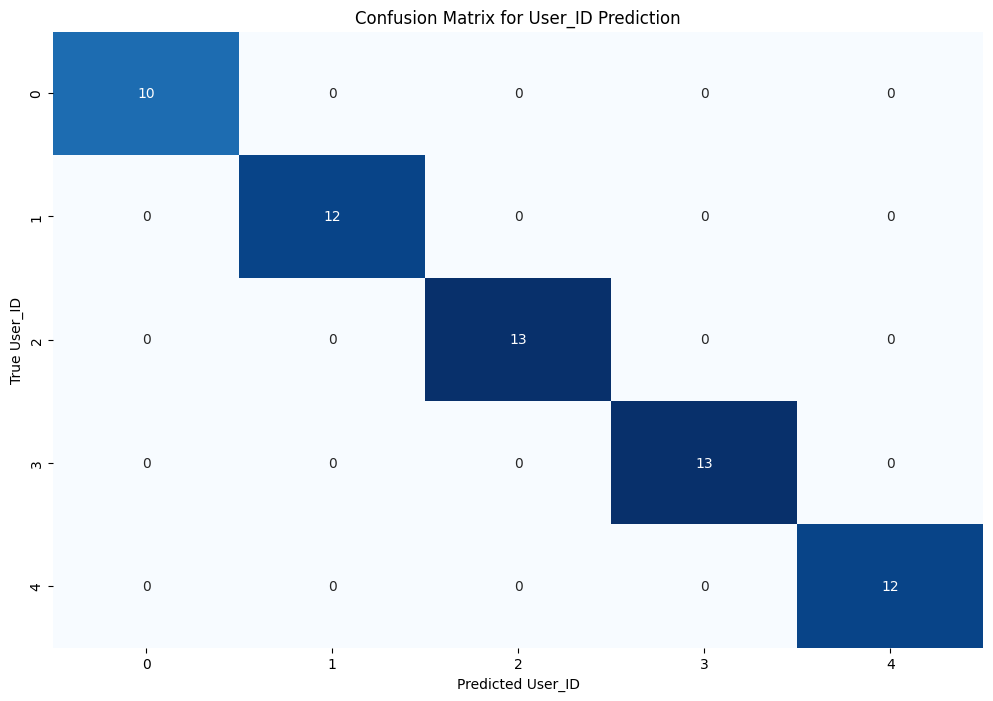

In [114]:
# Confusion Matrix for User_ID prediction
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for User_ID Prediction')
plt.xlabel('Predicted User_ID')
plt.ylabel('True User_ID')
plt.show()

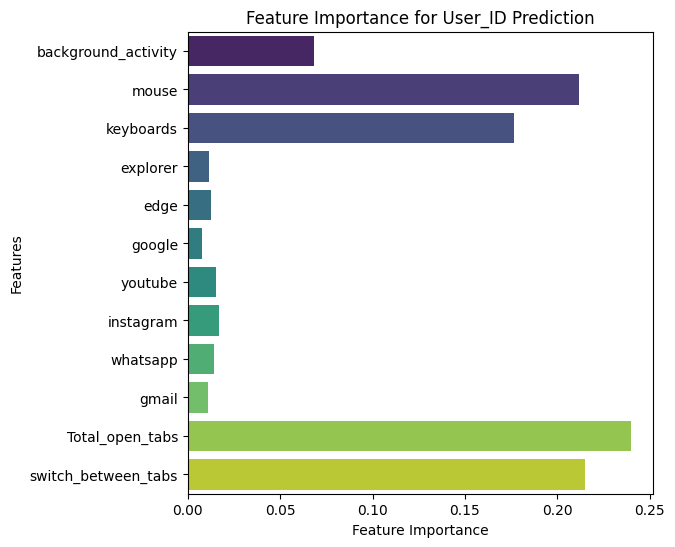

In [5]:
# Feature Importance Plot
plt.figure(figsize=(6, 6))
feature_importance = clf.feature_importances_
sns.barplot(x=feature_importance, y=X.columns, palette='viridis')
plt.title('Feature Importance for User_ID Prediction')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

## SGD

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
# Train the SGDClassifier
clf = SGDClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Predict User_ID on the validation set
y_val_pred = clf.predict(X_val_scaled)

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.2f}')

Validation Accuracy: 1.00


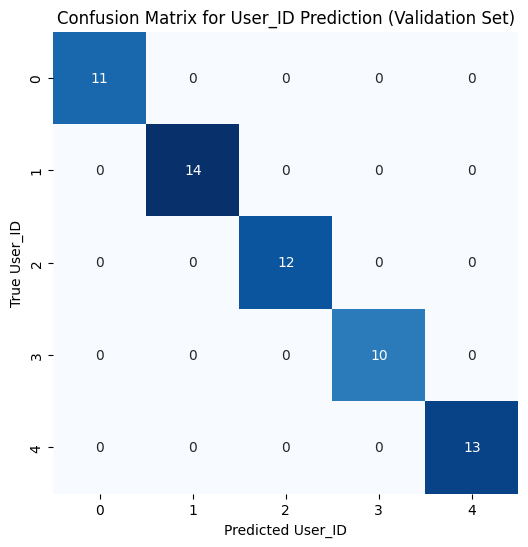

In [7]:
# Confusion Matrix for User_ID prediction on the validation set
conf_mat_val = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat_val, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for User_ID Prediction (Validation Set)')
plt.xlabel('Predicted User_ID')
plt.ylabel('True User_ID')
plt.show()

Test Accuracy: 1.00


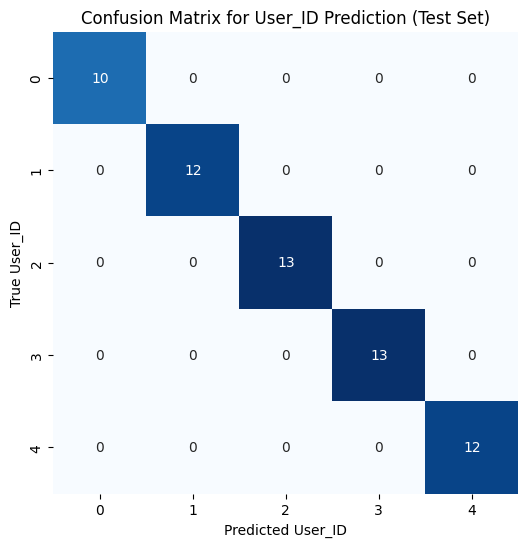

In [8]:

# Predict User_ID on the test set
y_test_pred = clf.predict(X_test_scaled)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.2f}')

# Confusion Matrix for User_ID prediction on the test set
conf_mat_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for User_ID Prediction (Test Set)')
plt.xlabel('Predicted User_ID')
plt.ylabel('True User_ID')
plt.show()

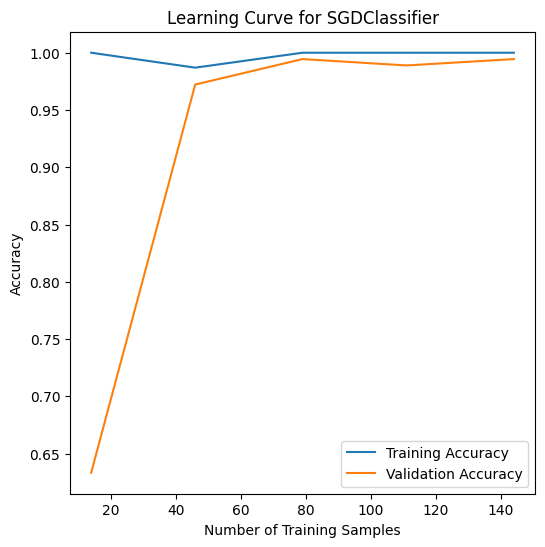

In [9]:
from sklearn.model_selection import learning_curve

# Plot Learning Curve
train_sizes, train_scores, test_scores = learning_curve(clf, X_train_scaled, y_train, cv=5)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(6, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
plt.title('Learning Curve for SGDClassifier')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#plot for number of users. --- TODO

MLP

In [10]:
from sklearn.neural_network import MLPClassifier

# Train the MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_clf.fit(X_train_scaled, y_train)

# Predict User_ID on the validation set
y_val_pred = mlp_clf.predict(X_val_scaled)

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.2f}')

Validation Accuracy: 0.98


In [11]:
from sklearn.svm import LinearSVC


svm_clf = LinearSVC(random_state=42)
svm_clf.fit(X_train_scaled, y_train)

# Predict User_ID on the validation set
y_val_pred = svm_clf.predict(X_val_scaled)

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.2f}')

Validation Accuracy: 1.00


In [12]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score

# Assuming X_train_scaled, y_train, X_val_scaled, and y_val are your training and validation data

# Create and fit the Isolation Forest model
isolation_forest_clf = IsolationForest(random_state=42)
isolation_forest_clf.fit(X_train_scaled)

# Predict on the validation set
y_val_pred = isolation_forest_clf.predict(X_val_scaled)

# Isolation Forest returns 1 for inliers and -1 for outliers
# Convert predictions to binary labels (1 for inliers, 0 for outliers)
y_val_pred_binary = (y_val_pred == 1).astype(int)

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred_binary)
print(f'Validation Accuracy: {val_accuracy:.2f}')

Validation Accuracy: 0.03


In [115]:
#  from sklearn.ensemble import IsolationForest
#  clf = IsolationForest(random_state=42).fit(X_train_scaled)
#  y_val_pred = clf.predict(X_val_scaled)
#  print(y_val_pred)

In [40]:
X_train.head()

,background_activity,mouse,keyboards,explorer,edge,google,youtube,instagram,whatsapp,gmail,Total_open_tabs,switch_between_tabs
55,23,32,5,0.533417,0.604113,0.944837,0.216174,0.310287,0.665777,0.249137,50,24
172,17,8,11,0.762600,0.641638,0.475045,0.546601,0.770451,0.292978,0.175257,14,1
184,20,49,39,0.894379,0.837932,0.306159,0.750024,0.035124,0.298657,0.125306,4,6
167,16,14,8,0.431543,0.256456,0.304063,0.828045,0.162749,0.226444,0.586303,17,6
139,27,35,37,0.289495,0.921972,0.261669,0.617603,0.599164,0.239991,0.686967,2,5


## Ioslation forest

In [116]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Assuming X_train_scaled, y_train, X_val_scaled, and y_val are your training and validation data

num_classes = 5

# Create a list to store Isolation Forest models
isolation_forest_models = []

# Fit an Isolation Forest model for each class
for i in range(1, num_classes+1):
    # Treat class i as the "normal" class, and others as "anomalies"
    #y_train_binary = np.where(y_train == i, 1, -1)

    mask = (y_train == i)
    # print(mask)
    X_train_some = X_train[mask]
    print(type(X_train_some))
    non_i_mask = (y_train != i)
    non_i_indices = np.where(non_i_mask)[0]
    # take from all classes - TODO
    # cross validation for each user: rest set 1 user then some other user then third user and create a plot incrementally -TODO
    # the order in which user clicks makes difference, feature vector in series of applications
    # 1: using applications it access, 2: removing everything(all users with firefox usage), 3: in series of what users access
    # plot prediction with time for users
    random_indices = np.random.choice(non_i_indices, size=20, replace=False)
    # print(random_indices[0])
    X_train_some_other_class = []
    for val in random_indices:
      X_train_some_other_class.append(X_train.iloc[val])
    df1 = pd.DataFrame(X_train_some_other_class)
    print(type(df1))
    df1 = df1.append(X_train_some, ignore_index=True)
    print(type(X_train_some))
    # Create and fit the Isolation Forest model
    model = IsolationForest(n_estimators=2, random_state=42, contamination='auto')
    model.fit(df1)

    # Append the model to the list
    isolation_forest_models.append(model)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


<ipython-input-116-e0e750e1a63d>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(X_train_some, ignore_index=True)
<ipython-input-116-e0e750e1a63d>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(X_train_some, ignore_index=True)
<ipython-input-116-e0e750e1a63d>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(X_train_some, ignore_index=True)
<ipython-input-116-e0e750e1a63d>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(X_train_some, ignore_index=True)
<ipython-input-116-e0e750e1a63d>:29: FutureWarning: The frame.append method is deprecated and will be removed fr

In [117]:
val_anomaly_scores = np.array([model.decision_function(X_val) for model in isolation_forest_models])
print(val_anomaly_scores)

[[-0.15263075 -0.01851321 -0.00196913 -0.12240781 -0.06609594 -0.06609594
  -0.09358448 -0.12240781  0.02127675 -0.09358448 -0.09358448 -0.08777595
  -0.15263075 -0.15263075 -0.12240781 -0.00984049 -0.03459737 -0.0605564
  -0.12240781 -0.12240781 -0.15263075 -0.18432125 -0.09358448 -0.18432125
  -0.12240781 -0.12240781  0.04344614 -0.01487885 -0.03459737 -0.0605564
  -0.12240781 -0.0605564  -0.21755059 -0.00984049 -0.01487885 -0.0605564
  -0.03459737 -0.11631723 -0.12240781  0.04344614 -0.12240781 -0.03459737
  -0.15263075 -0.09358448 -0.09358448 -0.11631723 -0.00485144 -0.12240781
  -0.06609594 -0.00984049 -0.15263075 -0.09358448  0.02127675 -0.15263075
  -0.0605564  -0.09358448 -0.00485144 -0.15263075  0.04344614 -0.15263075]
 [-0.0859435  -0.11511988 -0.1779034  -0.05815101 -0.0859435  -0.05815101
  -0.05815101 -0.11511988 -0.0859435   0.00364769  0.06295996 -0.0859435
  -0.21165882 -0.1779034  -0.05255422 -0.0859435  -0.03167678  0.02516994
  -0.11511988 -0.05815101 -0.0859435  -0.

In [118]:
print(val_anomaly_scores.shape)

(5, 60)


In [119]:
# Predict on the validation set

# Assign the instance to the class with the lowest anomaly score
y_val_pred = np.argmin(val_anomaly_scores, axis=0) + 1
#print(y_val_pred)
#print(y_val)
# Note: Depending on the problem, you might need to adjust the threshold for classification


In [120]:
print(val_anomaly_scores.shape)

(5, 60)


In [121]:
# Evaluate the performance
from sklearn.metrics import accuracy_score
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.2f}')

Validation Accuracy: 0.13


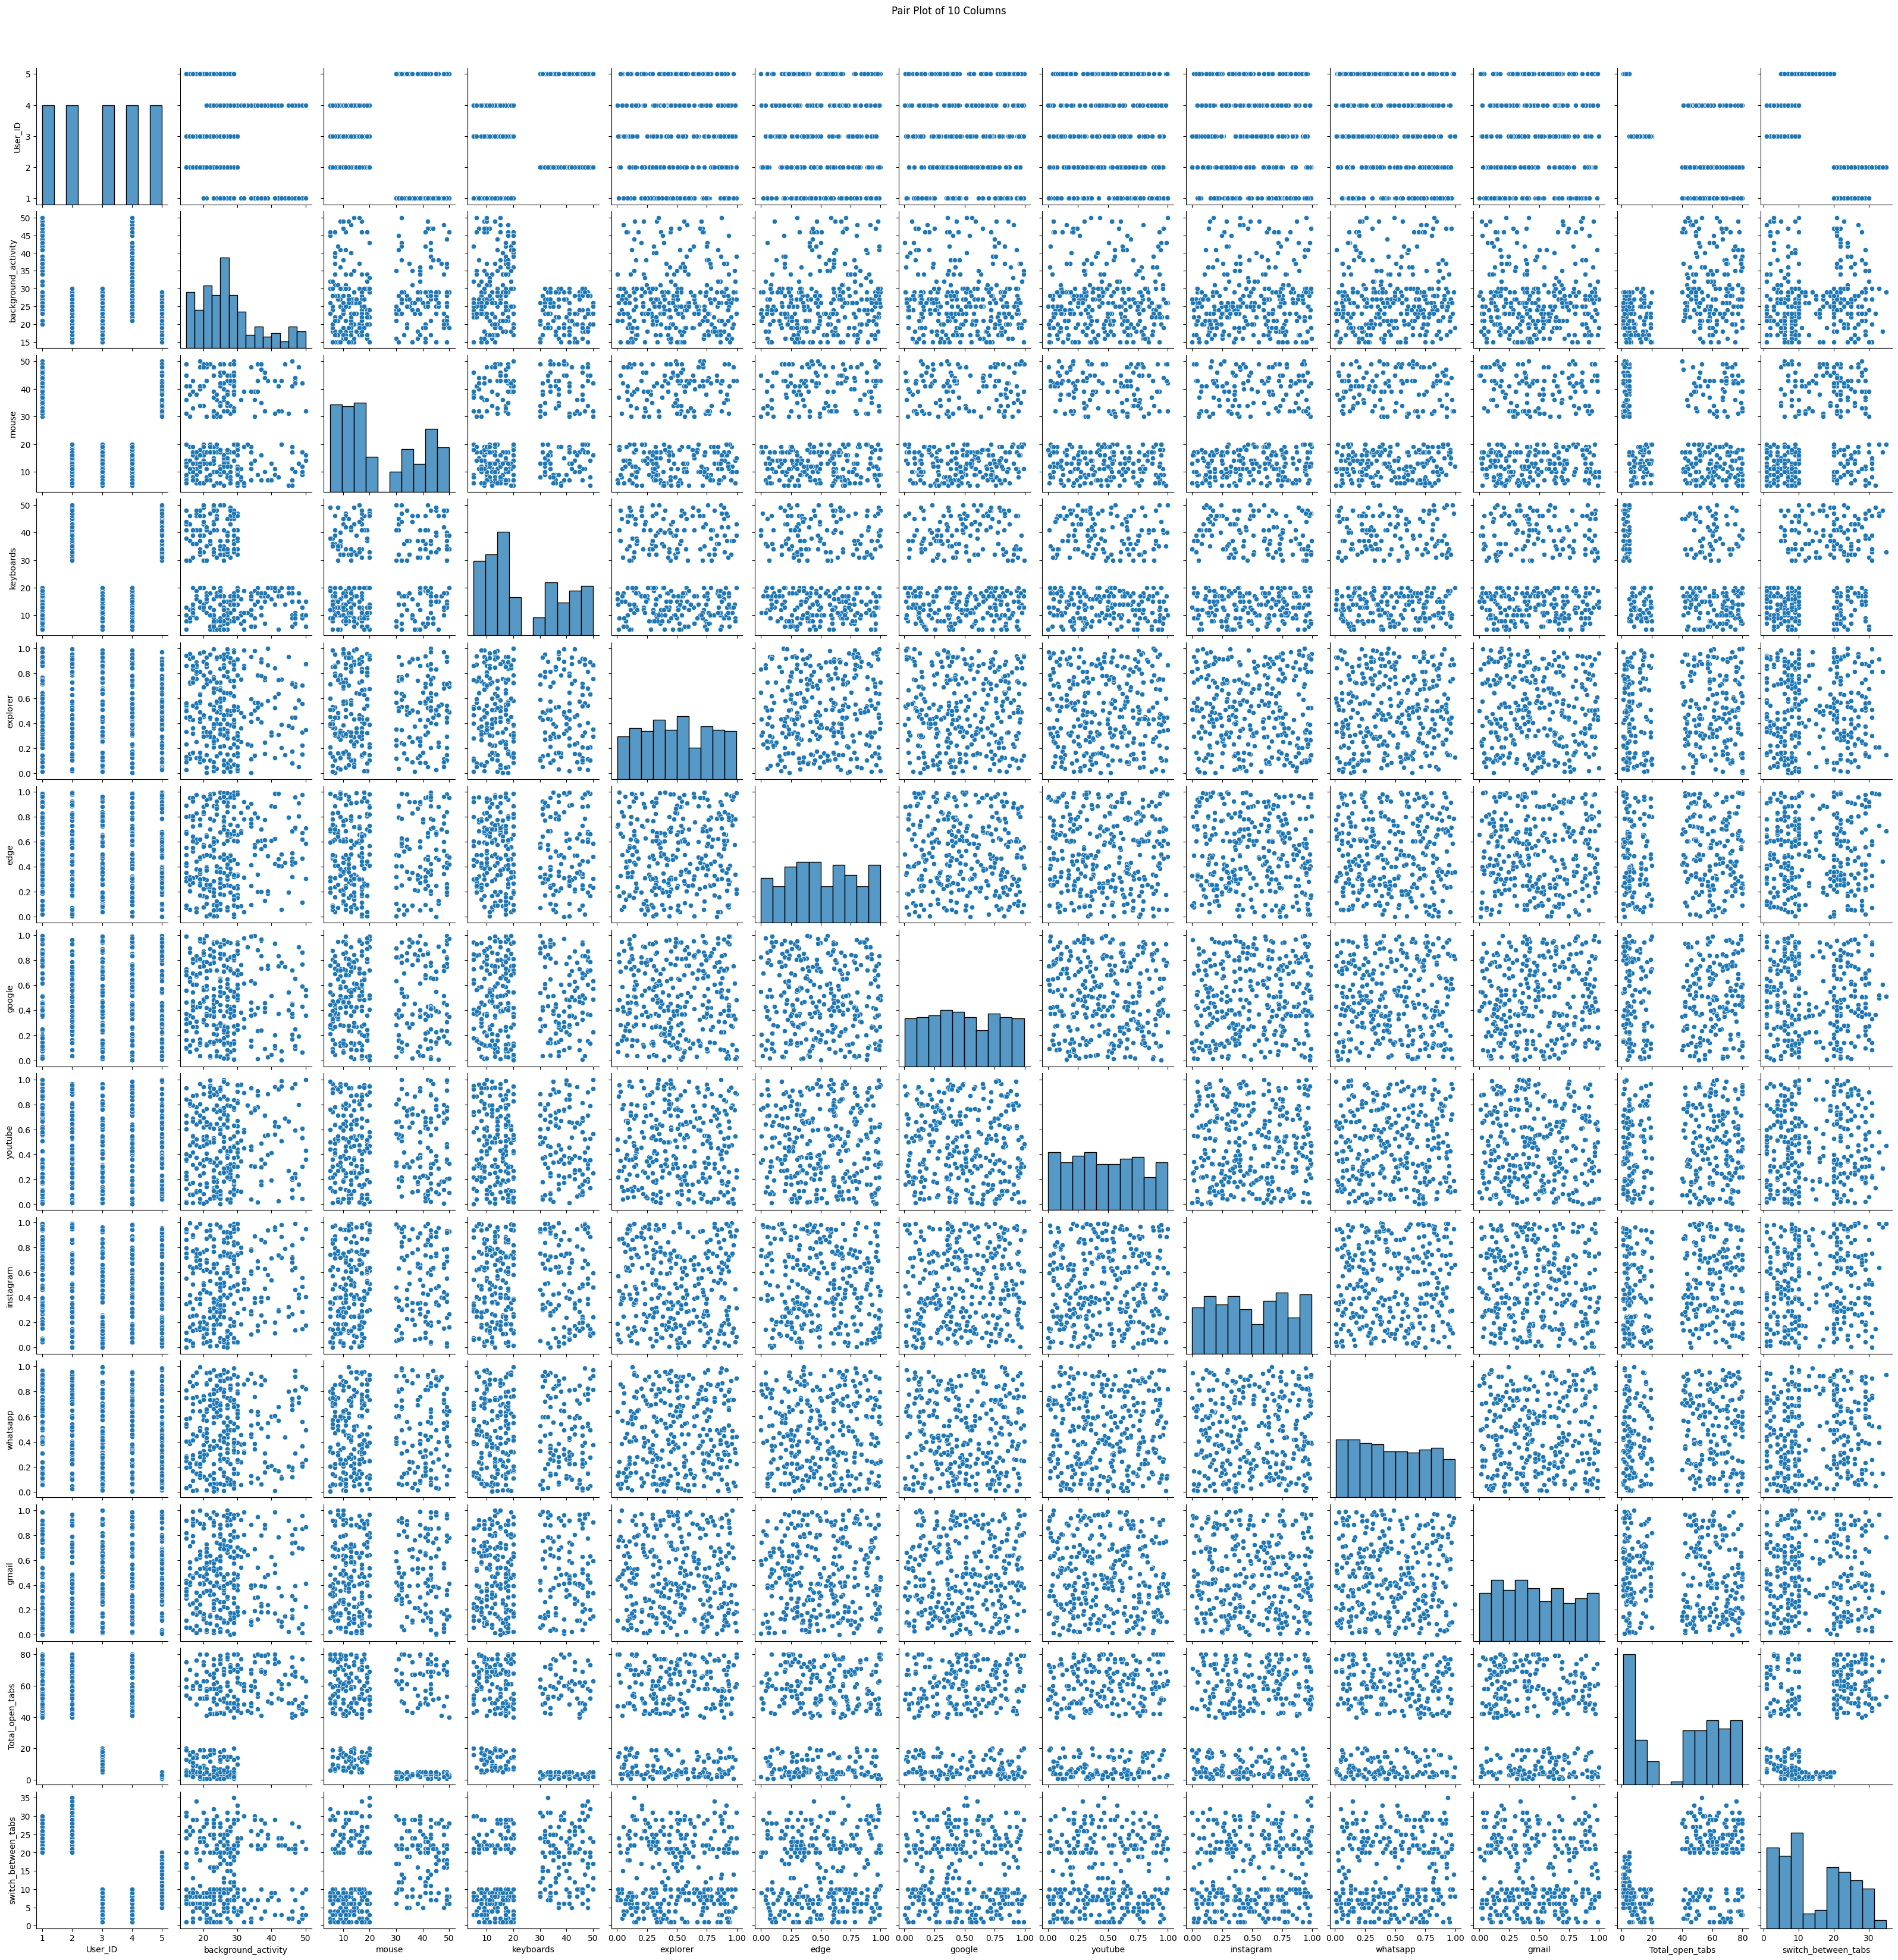

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a pair plot
sns.pairplot(df)
plt.suptitle('Pair Plot of 10 Columns', y=1.02)  # Optional title
plt.show()

One class SVM RBF

In [126]:
from sklearn.svm import OneClassSVM

svm_models = []

# Fit an Isolation Forest model for each class
for i in range(1, num_classes+1):

    mask = (y_train == i)
    # print(mask)
    X_train_some = X_train[mask]
    print(type(X_train_some))
    non_i_mask = (y_train != i)
    non_i_indices = np.where(non_i_mask)[0]
    random_indices = np.random.choice(non_i_indices, size=20, replace=False)
    # print(random_indices[0])
    X_train_some_other_class = []
    for val in random_indices:
      X_train_some_other_class.append(X_train.iloc[val])
    df1 = pd.DataFrame(X_train_some_other_class)
    print(type(df1))
    df1 = df1.append(X_train_some, ignore_index=True)
    print(type(X_train_some))
    model = OneClassSVM(gamma='auto' ,kernel='rbf').fit(df1)

    # Append the model to the list
    svm_models.append(model)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


<ipython-input-126-715ec2e8e8d9>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(X_train_some, ignore_index=True)
<ipython-input-126-715ec2e8e8d9>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(X_train_some, ignore_index=True)
<ipython-input-126-715ec2e8e8d9>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(X_train_some, ignore_index=True)
<ipython-input-126-715ec2e8e8d9>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(X_train_some, ignore_index=True)
<ipython-input-126-715ec2e8e8d9>:21: FutureWarning: The frame.append method is deprecated and will be removed fr

In [127]:
val_scores = np.array([model.score_samples(X_val) for model in svm_models])
print(val_scores)

[[1.17625880e-03 2.37331310e-02 5.09570282e-02 2.57894073e-09
  2.45997722e-03 1.12240002e-01 5.71877541e-02 3.97922972e-03
  1.95545528e-03 1.30866913e-04 4.44089210e-16 4.25629835e-05
  1.37579947e-11 3.91785085e-05 3.68160268e-05 1.72377402e-04
  7.68906499e-04 3.88173873e-03 1.12225535e-02 9.54265424e-07
  2.56880197e-03 7.56382425e-02 5.11335256e-05 6.13338724e-09
  8.47493050e-05 3.25151017e-12 1.28917455e-04 8.23622019e-07
  3.41358860e-04 1.76949855e-04 4.18483061e-03 0.00000000e+00
  5.35610445e-11 3.24897260e-04 1.55698926e-01 2.92290978e-04
  5.55166608e-04 3.04237140e-03 1.34213388e-04 1.47776300e-05
  2.83824855e-01 1.22111098e-07 3.28724171e-08 2.20904688e-01
  1.91102689e-12 1.89563455e-04 3.01423295e-08 6.30353769e-09
  1.75263667e-05 1.28450910e-05 5.50849990e-06 2.18706482e-05
  1.83133252e-07 4.05321974e-02 0.00000000e+00 8.51839959e-03
  6.40490498e-04 6.43795184e-08 1.82214070e-05 1.17782074e-04]
 [3.97356703e-10 1.07542830e-04 8.74257252e-07 1.31142181e-03
  5.665

In [128]:
y_val_pred = np.argmax(val_anomaly_scores, axis=0) + 1

In [129]:
# Evaluate the performance
from sklearn.metrics import accuracy_score
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.2f}')

Validation Accuracy: 0.35


## SVC linear

In [130]:
from sklearn.svm import OneClassSVM

svm_models = []

# Fit an Isolation Forest model for each class
for i in range(1, num_classes+1):

    mask = (y_train == i)
    # print(mask)
    X_train_some = X_train[mask]
    print(type(X_train_some))
    non_i_mask = (y_train != i)
    non_i_indices = np.where(non_i_mask)[0]
    random_indices = np.random.choice(non_i_indices, size=20, replace=False)
    # print(random_indices[0])
    X_train_some_other_class = []
    for val in random_indices:
      X_train_some_other_class.append(X_train.iloc[val])
    df1 = pd.DataFrame(X_train_some_other_class)
    print(type(df1))
    df1 = df1.append(X_train_some, ignore_index=True)
    print(type(X_train_some))
    model = OneClassSVM(gamma='auto' ,kernel='linear').fit(df1)

    # Append the model to the list
    svm_models.append(model)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


<ipython-input-130-7ea9c63e9b4a>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(X_train_some, ignore_index=True)
<ipython-input-130-7ea9c63e9b4a>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(X_train_some, ignore_index=True)
<ipython-input-130-7ea9c63e9b4a>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(X_train_some, ignore_index=True)
<ipython-input-130-7ea9c63e9b4a>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(X_train_some, ignore_index=True)
<ipython-input-130-7ea9c63e9b4a>:21: FutureWarning: The frame.append method is deprecated and will be removed fr

In [131]:
val_scores = np.array([model.score_samples(X_val) for model in svm_models])
print(val_scores)

[[ 73266.77212088 153081.79122066 146460.84954541 110900.93420511
   97841.02105141 117947.89062558 173855.41372176  57536.68701623
   63843.422551   113743.22794948 139884.71444279  42041.07584832
  127298.24743564  81136.1079014   37463.5232189   45195.61164325
   44637.30224455 154302.6855862   98840.96226281  74643.13866865
   74594.00246012  71316.43346464 102619.25189345 123019.36590718
   74662.50183896 102503.1607239   59276.67440427 118194.12801848
   81411.69936583  50141.5737425   46607.29358897 130244.31181014
  102680.3016267  157208.84535603 159393.88846276 134441.02742904
  158936.01604367  97359.36713006 128030.3233914  132972.40831017
   73573.57886518 101152.75293568  28651.42501237 145592.09783108
  138109.54245773  54178.73275284  55630.75375622 111684.20232316
   73671.62651744 104049.53962047  69575.46496819 112967.53136878
  105700.70320186  54271.69519777 157358.74064941 140779.20686181
   42576.65769135 119491.4637933   75152.76819019 118261.1707062 ]
 [ 65967.

In [132]:
y_val_pred = np.argmax(val_anomaly_scores, axis=0) + 1

In [133]:
# Evaluate the performance
from sklearn.metrics import accuracy_score
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.2f}')

Validation Accuracy: 0.35


In [ ]:
# random forest(any classifier)+ time series